In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
dataset1 = '2-wayEpi_100feat.txt'
dataset2 = '2Additive_2-wayEpi_100feat.txt'
dataset3 = '4-wayAdditive_100feat.txt'
dataset4 = '4-wayHeterogeneous_100feat.txt'

In [45]:
dataset = dataset1
df = pd.read_csv(dataset, sep='\t')

In [46]:
X = df.drop('Class', axis=1)
y = df['Class']

Class distribution
Class
1    500
0    500
Name: count, dtype: int64


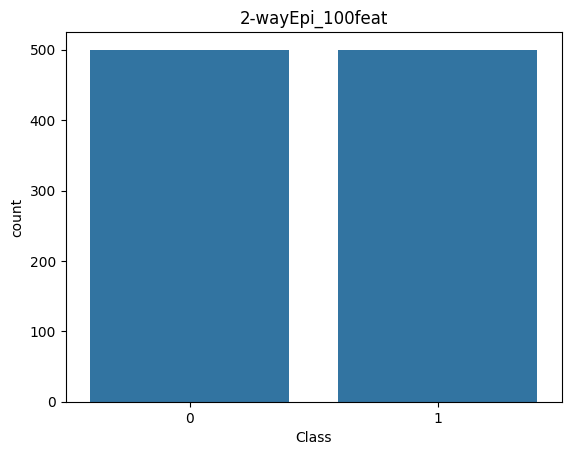

In [47]:
# Check for data imbalance
print('Class distribution')
print(y.value_counts())

# Plot the data
sns.countplot(x='Class', data=df)
plt.title(dataset[:-4])
plt.show()

In [48]:
# Print feature if it has missing values else print None
print('Features with missing values:')
if X.isnull().sum().any():
    print(X.columns[X.isnull().sum() > 0])
else:
    print('None')


Features with missing values:
None


In [49]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.455


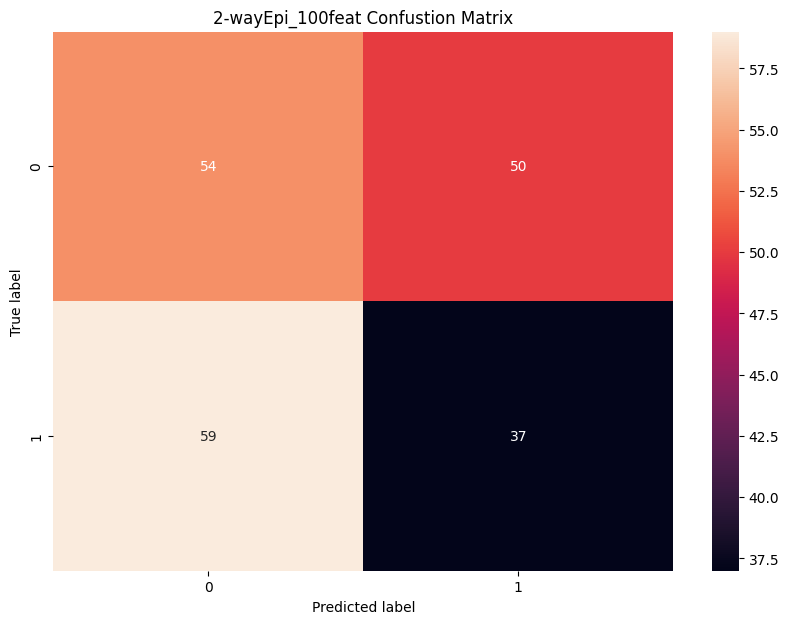

In [51]:
# Draw confusion matrix
cm = confusion_matrix(y_test, y_pred)
# size of confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title(dataset[:-4] + ' Confustion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [52]:
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.52      0.50       104
           1       0.43      0.39      0.40        96

    accuracy                           0.46       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.46      0.45       200

